In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Least squares and linear basis functions models
## Least squares

In [2]:
def RMSE(y, tx, w):
    # Compute MSE
    e = y - np.dot(tx, w)
    N = len(y)
    
    L = 1/(2*N)*np.dot(np.transpose(e),e)
    
    return np.sqrt(2*L)
    
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************

    # raise NotImplementedError    
    
    # Compute optimal weights
    xx = np.dot(np.transpose(tx),tx)
    try:
        inv = np.linalg.inv(xx)
    except:
        raise ValueError("Matrix X^TX not invertible")
        
    xy = np.dot(np.transpose(tx),y)
    w_star = np.dot(inv, xy)
    
    return w_star     
    
tx = np.random.rand(3,3)
tx = np.diag(np.diag(tx))
#tx[0][0] = 0
y = np.random.rand(3)
w_star = least_squares(y,tx)
print(RMSE(y, tx, w_star))
print(w_star)
        
    

2.00308613165e-18
[ 0.35904503  0.69969103  4.25562034]


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
from grid_search import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    
    #raise NotImplementedError
    
    # Least Square
    w_star = least_squares(y,tx)
    L = RMSE(y, tx, w_star)**2/2 # Obtain the MSE
    print("Loss obtained with Least-Square: %f"%L)
    print("Weights obtained with Least-Square: w0 = %f, w1 = %f" 
          %(w_star[0], w_star[1]))
    
    # Grid Search
    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=100)

    # Start the grid search
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    
    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    
    print("Loss obtained with Grid Search: %f"%loss_star)
    print("Weights obtained with Grid Search: w0 = %f, w1 = %f" 
          %(w0_star, w1_star))      

test_your_least_squares()

Loss obtained with Least-Square: 15.385888
Weights obtained with Least-Square: w0 = 73.293922, w1 = 13.479712
Loss obtained with Grid Search: 15.558703
Weights obtained with Grid Search: w0 = 72.727273, w1 = 13.636364


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [4]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [5]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    
    #raise NotImplementedError
    
    n_x = len(x)
    mat = np.zeros((n_x, degree+1))
        
    for i in range(n_x):
        for j in range(degree+1):
            mat[i][j] = x[i]**j
            
    return mat
    
#test = np.random.rand(6,1)
mat = build_poly(x,2)
print(mat)

[[  1.00000000e+00   3.52374910e-01   1.24168077e-01]
 [  1.00000000e+00   4.89512330e+00   2.39622321e+01]
 [  1.00000000e+00   1.86662437e+00   3.48428655e+00]
 [  1.00000000e+00   3.50706129e+00   1.22994789e+01]
 [  1.00000000e+00   3.38087384e+00   1.14303079e+01]
 [  1.00000000e+00   7.30937276e-01   5.34269301e-01]
 [  1.00000000e+00   3.88562366e+00   1.50980712e+01]
 [  1.00000000e+00   5.65224803e+00   3.19479078e+01]
 [  1.00000000e+00   6.28318531e+00   3.94784176e+01]
 [  1.00000000e+00   2.37137419e+00   5.62341557e+00]
 [  1.00000000e+00   6.04749821e-01   3.65722346e-01]
 [  1.00000000e+00   3.63324875e+00   1.32004965e+01]
 [  1.00000000e+00   8.57124731e-01   7.34662804e-01]
 [  1.00000000e+00   2.49756165e+00   6.23781420e+00]
 [  1.00000000e+00   1.61424946e+00   2.60580133e+00]
 [  1.00000000e+00   5.39987312e+00   2.91586297e+01]
 [  1.00000000e+00   6.15699785e+00   3.79086225e+01]
 [  1.00000000e+00   6.03081040e+00   3.63706740e+01]
 [  1.00000000e+00   4.78562

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737506
Processing 3th experiment, degree=7, rmse=0.2496587036090866
Processing 4th experiment, degree=12, rmse=0.2989996031513126


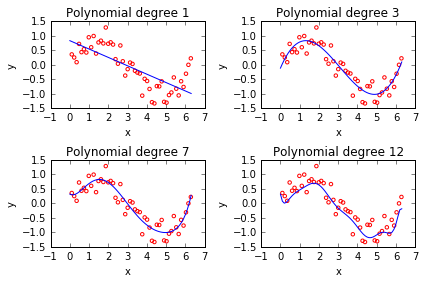

In [6]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        
        #raise NotImplementedError
        
        mat = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        
        #raise NotImplementedError
        
        trsp = np.dot(np.transpose(mat), mat)
        inv = np.linalg.inv(trsp)
        xty = np.dot(np.transpose(mat), y)
        weight = np.dot(inv, xty)
        
        #print(weight)
               
        rmse = RMSE(y, mat, weight)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [7]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    
    #raise NotImplementedError
    
    n = len(x)
    if len(y) != n:
        raise ValueError("Vector x and y have a different size")
        
    n_train = int(ratio*n)
    train_ind = np.random.choice(n, n_train, replace=False)
        
    index = np.arange(n)
    
    mask = np.in1d(index, train_ind)
    
    test_ind = np.random.permutation(index[~mask])
    
    x_train = x[train_ind]
    y_train = y[train_ind]
    
    x_test = x[test_ind]
    y_test = y[test_ind]
    
    return x_train, y_train, x_test, y_test 
    
split_data(x, y, 0.5)

(array([ 5.77843549,  3.00231147,  2.6237491 ,  5.02131076,  1.86662437,
         3.50706129,  2.74993656,  1.2356871 ,  5.90462294,  1.99281183,
         1.48806201,  5.52606058,  0.98331219,  0.22618746,  2.87612401,
         3.12849893,  5.14749821,  4.01181111,  1.10949964,  2.49756165,
         4.76893584,  6.0308104 ,  3.25468638,  2.11899928,  0.1       ]),
 array([-0.56851939, -0.15050841,  0.66750938, -1.30763072,  1.28930361,
        -0.26815701,  0.12187968,  0.99490902, -0.76646743,  0.72778149,
         0.77328884, -0.82651893,  0.95121182,  0.25252451, -0.37259529,
         0.07691219, -1.04670162, -0.55991146,  0.60599855,  0.03761024,
        -0.57230535, -0.30857575,  0.03052242,  0.77707185,  0.35915261]),
 array([ 1.36187455,  4.13799857,  0.60474982,  1.74043692,  5.65224803,
         0.47856237,  4.8951233 ,  6.15699785,  4.51656093,  3.38087384,
         3.63324875,  4.64274839,  0.35237491,  2.24518674,  0.85712473,
         5.39987312,  1.61424946,  4.39037348, 

Then, test your `split_data` function below.

In [18]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    #raise NotImplementedError
    
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    #raise NotImplementedError
    
    tx_train = build_poly(x_train, degree)
    tx_test = build_poly(x_test, degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    #raise NotImplementedError
    
    w_star = least_squares(y_train, tx_train)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    #raise NotImplementedError
    
    rmse_tr = RMSE(y_train, tx_train, w_star)
    rmse_te = RMSE(y_test, tx_test, w_star)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.409, Testing RMSE=0.410
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.232, Testing RMSE=1.490
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=1.337, Testing RMSE=3.172
proportion=0.1, degree=12, Training RMSE=11.562, Testing RMSE=92.441


# Ridge Regression
Please fill in the function below.

In [14]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    
    #raise NotImplementedError
    
    # Compute optimal weights
    xx = np.dot(np.transpose(tx),tx)
    
    bxx = xx + lamb*np.identity(len(xx))
    
    try:
        inv = np.linalg.inv(bxx)
    except:
        raise ValueError("Matrix X^TX not invertible") 
        
    xy = np.dot(np.transpose(tx),y)
    w_star = np.dot(inv, xy)
    
    return w_star      

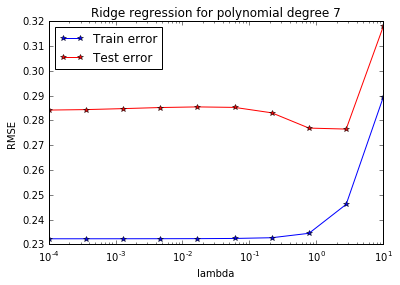

In [20]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-4, 1, 10)    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    #raise NotImplementedError
    
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    # raise NotImplementedError
    
    tx_train = build_poly(x_train, degree)
    tx_test = build_poly(x_test, degree)    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    #raise NotImplementedError
    
    rmse_tr = []
    rmse_te = []
    
    for i in range(len(lambdas)):
        w_star = ridge_regression(y_train, tx_train, lambdas[i])
    
        rmse_tr.append(RMSE(y_train, tx_train, w_star))
        rmse_te.append(RMSE(y_test, tx_test, w_star))
        
    plt.figure()
    plt.semilogx(lambdas, rmse_tr, 'b*-')
    plt.semilogx(lambdas, rmse_te, 'r*-')
    plt.xlabel('lambda')
    plt.ylabel('RMSE')
    plt.legend(['Train error', 'Test error'], loc=2)
    plt.title('Ridge regression for polynomial degree 7')
        

seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)